In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio.v2 as imageio
from IPython.display import Image, display

from scipy.optimize import curve_fit

from classy import Class

from hmf.alternatives.wdm import MassFunctionWDM
from hmf import MassFunction
from matplotlib.pyplot import subplots, subplots_adjust, savefig
from halomod import HaloModel
from halomod import TracerHaloModel as HM

My fitting function is given by 
$f(x) = ax+b\times arctan(c(x-d))+e$ where $x$ is $log_{10}(M)$ and $f(x)$ is $log_{10}(dndlnm)$.

In [117]:
def fitting_hmf(x, a, b, c, d, e):
    return a * x + b * np.arctan(c * (x - d)) + e
def fitting_hmf_mixed(x, a, b, c, d, e, f, g, h):
    return a * x + b * np.arctan(c * (x - d)) + e + f * np.arctan(g * (x - h))

/Users/sandychen/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


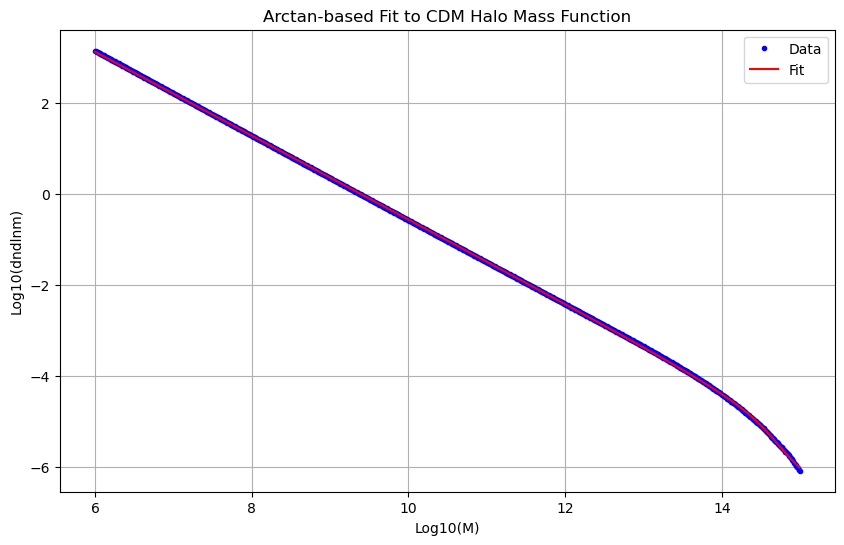

Optimal parameters are: [-0.91930172  0.40396777 -2.68003257 14.70660577  8.03398468  0.
  0.          0.5       ]


In [128]:
# Generate a halo mass function for CDM
cdm_mf = MassFunction(hmf_model="SMT",Mmin=6.0,z=0,hmf_params={"a":1},filter_model="SharpK",filter_params={"c":2.5})

# Take the logarithm of the data
log_m_cdm = np.log10(cdm_mf.m)  # This is log10 of M
log_dndlnm_cdm = np.log10(cdm_mf.dndlnm)  # This is log10 of dndlnm

# Using curve_fit to fit the data
initial_guess = [-0.91275743, -0.05581169, -5.01069161,  6.29722509,  7.81233294,  0,
 0, 0.5]  # Adjust based on your data and intuition
popt_cdm, pcov_cdm = curve_fit(fitting_hmf_mixed, log_m_cdm, log_dndlnm_cdm, p0=initial_guess)

# Plot the data and the fitting result
plt.figure(figsize=(10,6))
plt.plot(log_m_cdm, log_dndlnm_cdm, 'b.', label='Data')
plt.plot(log_m_cdm, fitting_hmf_mixed(log_m_cdm, *popt_cdm), 'r-', label='Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to CDM Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters are:", popt_cdm)

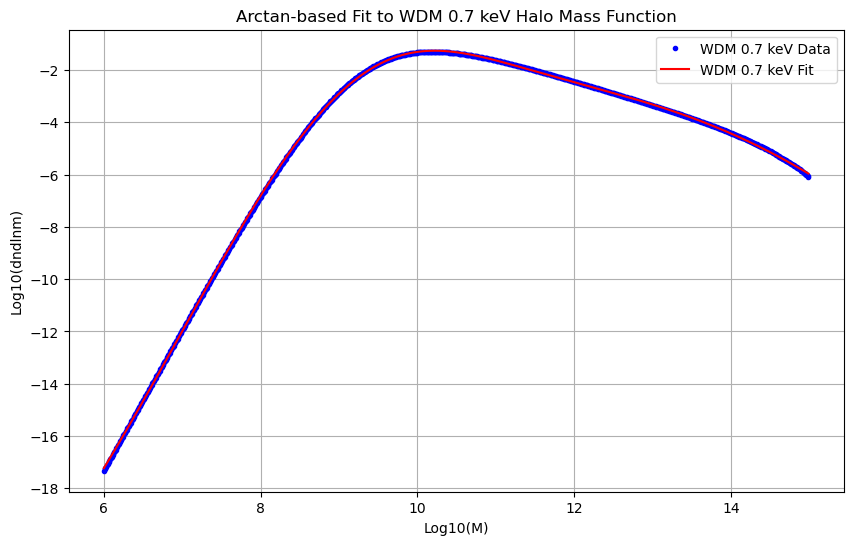

Optimal parameters for WDM 0.7 keV are: [ -5.78796786 -74.44022865  -0.17796778   7.86231112  27.61193599
 -12.65523973   0.43394758  10.34821661]


In [135]:
# Generate a halo mass function for WDM with 0.7 keV
wdm_0_7_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=0.7)

# Data for WDM with 0.7 keV
log_m_wdm_0_7 = np.log10(wdm_0_7_mf.m)
log_dndlnm_wdm_0_7 = np.log10(wdm_0_7_mf.dndlnm)
initial_guess_wdm_0_7 = [-1.41576343, -8.87631019, -0.7866761,   6.94535995,  2.80504833, -0.08719319,
 28.47482259, 14.78129615]
popt_wdm_0_7, pcov_wdm_0_7 = curve_fit(fitting_hmf_mixed, log_m_wdm_0_7, log_dndlnm_wdm_0_7, p0=initial_guess_wdm_0_7)

# Plot for WDM with 0.7 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_0_7, log_dndlnm_wdm_0_7, 'b.', label='WDM 0.7 keV Data')
plt.plot(log_m_wdm_0_7, fitting_hmf_mixed(log_m_wdm_0_7, *popt_wdm_0_7), 'r-', label='WDM 0.7 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 0.7 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()
print("Optimal parameters for WDM 0.7 keV are:", popt_wdm_0_7)

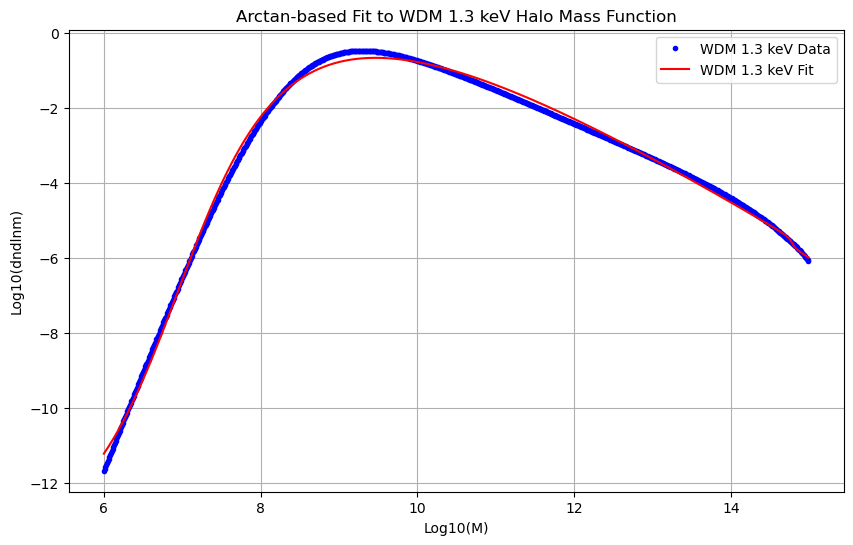

Optimal parameters for WDM 1.3 keV are: [-1.41576343 -8.87631019 -0.7866761   6.94535995  2.80504833 -0.08719319
 28.47482259 14.78129615]


In [134]:
# Generate a halo mass function for WDM with 1.3 keV
wdm_1_3_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=1.3)

# Data for WDM with 1.3 keV
log_m_wdm_1_3 = np.log10(wdm_1_3_mf.m)
log_dndlnm_wdm_1_3 = np.log10(wdm_1_3_mf.dndlnm)

# Use the previous guess as a starting point, but it's better to adjust this based on the specific characteristics of the 1.3 keV data.
initial_guess_wdm_1_3 = [ -1.27675858,  -7.11258878,  -0.92346378,  6.79425597,   3.08910275,
   0.12061688, -15.36144948,  14.72547083]
popt_wdm_1_3, pcov_wdm_1_3 = curve_fit(fitting_hmf_mixed, log_m_wdm_1_3, log_dndlnm_wdm_1_3, p0=initial_guess_wdm_1_3)

# Plot for WDM with 1.3 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_1_3, log_dndlnm_wdm_1_3, 'b.', label='WDM 1.3 keV Data')
plt.plot(log_m_wdm_1_3, fitting_hmf_mixed(log_m_wdm_1_3, *popt_wdm_1_3), 'r-', label='WDM 1.3 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 1.3 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()
print("Optimal parameters for WDM 1.3 keV are:", popt_wdm_1_3)


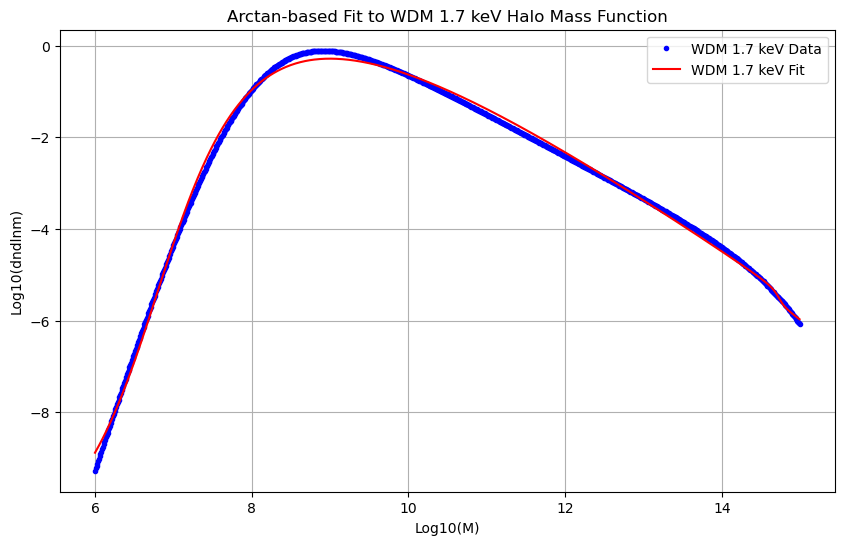

Optimal parameters for WDM 1.7 keV are: [ -1.27675858  -7.11258878  -0.92346378   6.79425597   3.08910275
   0.12061688 -15.36144948  14.72547083]


In [132]:
# Generate a halo mass function for WDM with 1.7 keV
wdm_1_7_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=1.7)

# Data for WDM with 1.7 keV
log_m_wdm_1_7 = np.log10(wdm_1_7_mf.m)
log_dndlnm_wdm_1_7 = np.log10(wdm_1_7_mf.dndlnm)

# Use the previous guess as a starting point, but you might need to adjust this based on the specific characteristics of the 1.7 keV data.
initial_guess_wdm_1_7 = [-1.04934422, -3.54193099, -1.39766901,  6.45412195,  4.72616066,  0.24017588,
 -5.12043033, 14.67077335]
popt_wdm_1_7, pcov_wdm_1_7 = curve_fit(fitting_hmf_mixed, log_m_wdm_1_7, log_dndlnm_wdm_1_7, p0=initial_guess_wdm_1_7)

# Plot for WDM with 1.7 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_1_7, log_dndlnm_wdm_1_7, 'b.', label='WDM 1.7 keV Data')
plt.plot(log_m_wdm_1_7, fitting_hmf_mixed(log_m_wdm_1_7, *popt_wdm_1_7), 'r-', label='WDM 1.7 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 1.7 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()
print("Optimal parameters for WDM 1.7 keV are:", popt_wdm_1_7)


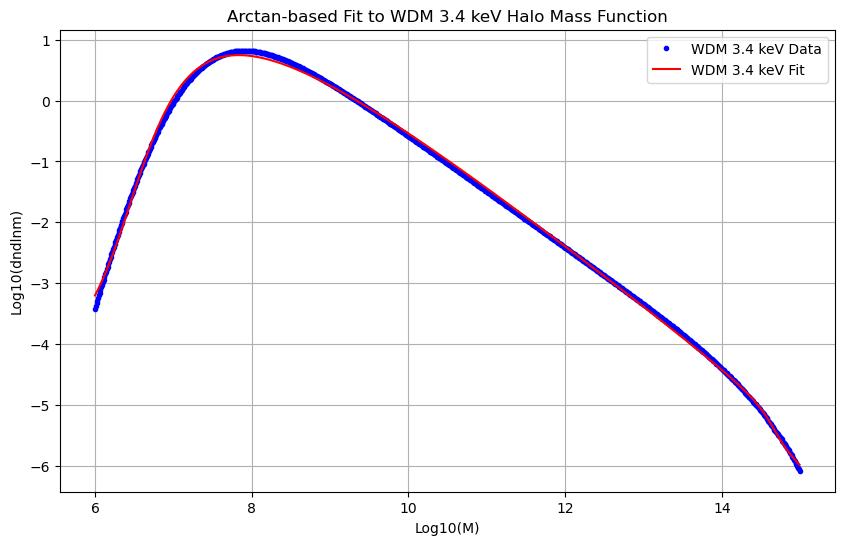

Optimal parameters for WDM 3.4 keV are: [-1.04934422 -3.54193099 -1.39766901  6.45412195  4.72616066  0.24017588
 -5.12043033 14.67077335]


In [130]:
# Generate a halo mass function for WDM with 3.4 keV
wdm_3_4_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=3.4)

# Data for WDM with 3.4 keV
log_m_wdm_3_4 = np.log10(wdm_3_4_mf.m)
log_dndlnm_wdm_3_4 = np.log10(wdm_3_4_mf.dndlnm)

# Use the previous guess as a starting point. Depending on how different the 3.4 keV data is from the previous datasets, you may need to adjust this.
initial_guess_wdm_3_4 = [-0.95410784, -1.42020207, -1.93646934,  6.26416504,  6.40860581,  0.36302968,
 -3.00710415, 14.70076585]
popt_wdm_3_4, pcov_wdm_3_4 = curve_fit(fitting_hmf_mixed, log_m_wdm_3_4, log_dndlnm_wdm_3_4, p0=initial_guess_wdm_3_4)

# Plot for WDM with 3.4 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_3_4, log_dndlnm_wdm_3_4, 'b.', label='WDM 3.4 keV Data')
plt.plot(log_m_wdm_3_4, fitting_hmf_mixed(log_m_wdm_3_4, *popt_wdm_3_4), 'r-', label='WDM 3.4 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 3.4 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()
print("Optimal parameters for WDM 3.4 keV are:", popt_wdm_3_4)


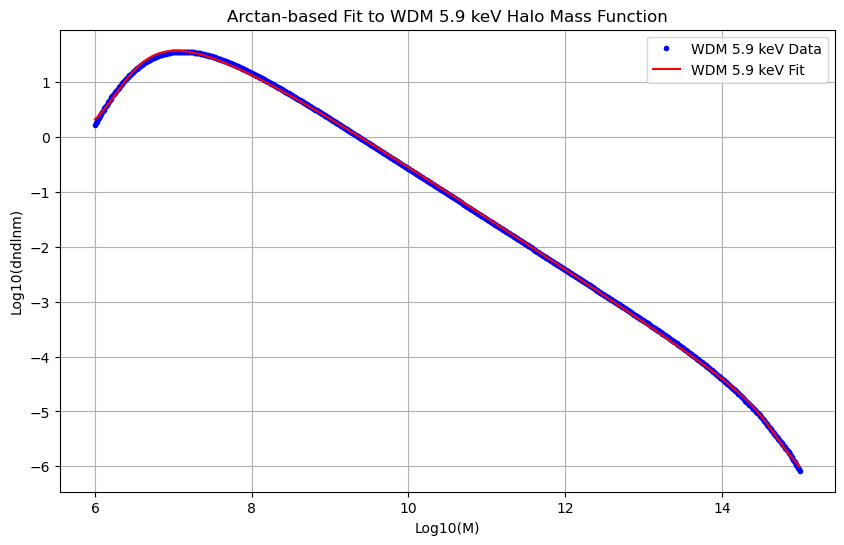

Optimal parameters for WDM 5.9 keV are: [-0.95928174 -1.55752878 -1.89003066  6.27455155  6.28383575  0.3535811
 -3.09879615 14.69652467]


In [129]:
# Generate a halo mass function for WDM with 5.9 keV
wdm_5_9_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=5.9)

# Data for WDM with 5.9 keV
log_m_wdm_5_9 = np.log10(wdm_5_9_mf.m)
log_dndlnm_wdm_5_9 = np.log10(wdm_5_9_mf.dndlnm)
initial_guess_wdm_5_9 = [-0.95410784, -1.42020207, -1.93646934,  6.26416504,  6.40860581,  0.36302968,
 -3.00710415, 14.70076585]
popt_wdm_5_9, pcov_wdm_5_9 = curve_fit(fitting_hmf_mixed, log_m_wdm_5_9, log_dndlnm_wdm_5_9, p0=initial_guess_wdm_5_9)

# Plot for WDM with 5.9 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_5_9, log_dndlnm_wdm_5_9, 'b.', label='WDM 5.9 keV Data')
plt.plot(log_m_wdm_5_9, fitting_hmf_mixed(log_m_wdm_5_9, *popt_wdm_5_9), 'r-', label='WDM 5.9 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 5.9 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()
print("Optimal parameters for WDM 5.9 keV are:", popt_wdm_5_9)


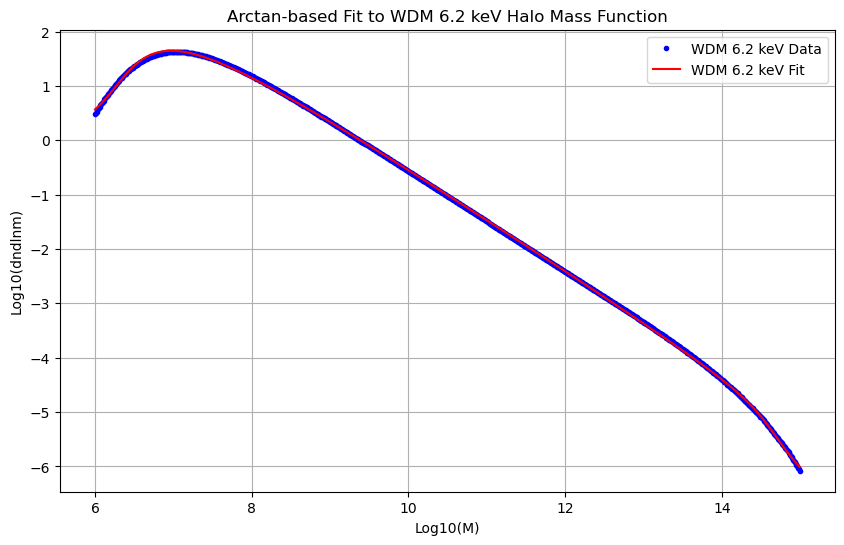

Optimal parameters for WDM 6.2 keV are: [-0.95410784 -1.42020207 -1.93646934  6.26416504  6.40860581  0.36302968
 -3.00710415 14.70076585]


In [118]:
# Generate a halo mass function for WDM with 6.2 keV
wdm_6_2_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=6.2)

# Data for WDM with 6.2 keV
log_m_wdm_6_2 = np.log10(wdm_6_2_mf.m)
log_dndlnm_wdm_6_2 = np.log10(wdm_6_2_mf.dndlnm)
#initial_guess_wdm_6_2 = [-1.065155,   -3.61472642, -1.46784907,  5.69651893,  5.03098477]
initial_guess_wdm_6_2 = [-1.92272672, -14.34786999, -0.54402045, 7.31357875, 3.68512658, -200, -15, 15]
popt_wdm_6_2, pcov_wdm_6_2 = curve_fit(fitting_hmf_mixed, log_m_wdm_6_2, log_dndlnm_wdm_6_2, p0=initial_guess_wdm_6_2)

# Plot for WDM with 6.2 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_6_2, log_dndlnm_wdm_6_2, 'b.', label='WDM 6.2 keV Data')
plt.plot(log_m_wdm_6_2, fitting_hmf_mixed(log_m_wdm_6_2, *popt_wdm_6_2), 'r-', label='WDM 6.2 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 6.2 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters for WDM 6.2 keV are:", popt_wdm_6_2)

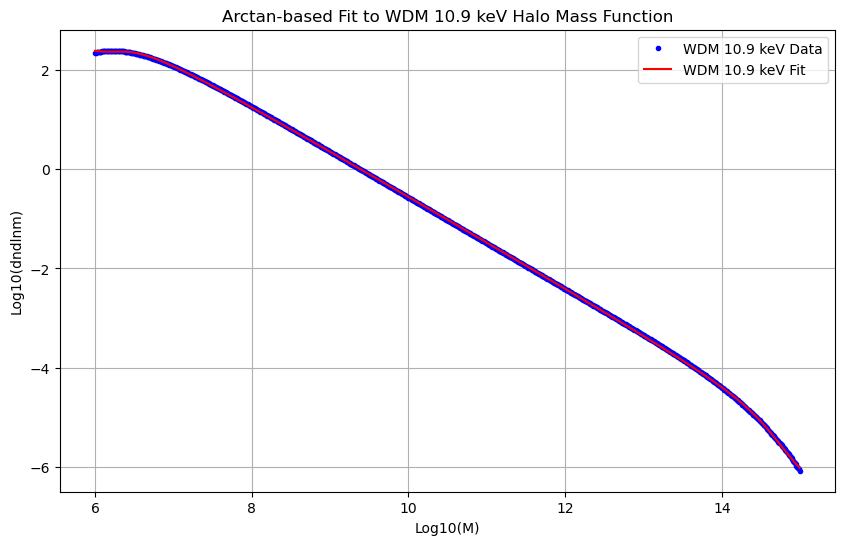

Optimal parameters for WDM 10.9 keV are: [-0.9195482  -0.37244904 -2.55874844  6.23480612  7.43606136  0.43960502
 -2.46370419 14.74287534]


In [119]:
# Generate a halo mass function for WDM with 10.9 keV
wdm_10_9_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=10.9)

# Data for WDM with 10.9 keV
log_m_wdm_10_9 = np.log10(wdm_10_9_mf.m)
log_dndlnm_wdm_10_9 = np.log10(wdm_10_9_mf.dndlnm)
initial_guess_wdm_10_9 = [-1.92272672, -14.34786999, -0.54402045, 7.31357875, 3.68512658, -200, -15, 15]
popt_wdm_10_9, pcov_wdm_10_9 = curve_fit(fitting_hmf_mixed, log_m_wdm_10_9, log_dndlnm_wdm_10_9, p0=initial_guess_wdm_10_9)

# Plot for WDM with 10.9 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_10_9, log_dndlnm_wdm_10_9, 'b.', label='WDM 10.9 keV Data')
plt.plot(log_m_wdm_10_9, fitting_hmf_mixed(log_m_wdm_10_9, *popt_wdm_10_9), 'r-', label='WDM 10.9 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 10.9 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters for WDM 10.9 keV are:", popt_wdm_10_9)


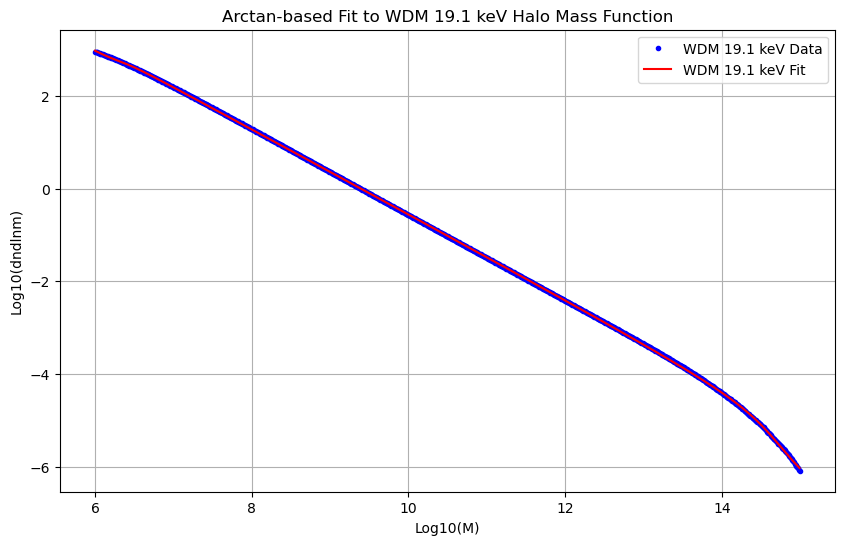

Optimal parameters for WDM 19.1 keV are: [-0.91275743 -0.05581169 -5.01069161  6.29722509  7.81233294  0.45165378
 -2.40065573 14.74811358]


In [121]:
# Generate a halo mass function for WDM with 19.1 keV
wdm_19_1_mf = MassFunctionWDM(hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}, wdm_mass=19.1)

# Data for WDM with 19.1 keV
log_m_wdm_19_1 = np.log10(wdm_19_1_mf.m)
log_dndlnm_wdm_19_1 = np.log10(wdm_19_1_mf.dndlnm)
initial_guess_wdm_19_1 = [-1.92272672, -14.34786999, -0.54402045, 7.31357875, 3.68512658, 0, -15, 15]
popt_wdm_19_1, pcov_wdm_19_1 = curve_fit(fitting_hmf_mixed, log_m_wdm_19_1, log_dndlnm_wdm_19_1, p0=initial_guess_wdm_19_1)

# Plot for WDM with 19.1 keV
plt.figure(figsize=(10, 6))
plt.plot(log_m_wdm_19_1, log_dndlnm_wdm_19_1, 'b.', label='WDM 19.1 keV Data')
plt.plot(log_m_wdm_19_1, fitting_hmf_mixed(log_m_wdm_19_1, *popt_wdm_19_1), 'r-', label='WDM 19.1 keV Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to WDM 19.1 keV Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters for WDM 19.1 keV are:", popt_wdm_19_1)


In [99]:
def prepare_class_params(params_dict):
    """
    Prepares the CLASS parameters from the given dictionary.
    """
    return {
        'H0': params_dict['H0'],
        'omega_b': params_dict['omega_b'],
        'omega_cdm': params_dict['omega_cdm'],
        'N_ur': params_dict['N_ur'],
        'N_ncdm': params_dict['N_ncdm'],
        'omega_ncdm': params_dict['omega_ncdm'],
        'm_ncdm': params_dict['m_ncdm'],
        'YHe': params_dict['YHe'],
        'tau_reio': params_dict['tau_reio'],
        'n_s': params_dict['n_s'],
        'A_s': params_dict['A_s'],
        'non linear': 'halofit',
        'output': 'tCl,pCl,lCl,mPk, mTk',
        'lensing': 'yes',
        'P_k_max_1/Mpc': 100.0,
    }

In [100]:
from halomod.wdm import HaloModelWDM
def run_class(params):
    # Initialize CLASS
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()

    # Get the transfer function
    transfer_function_class = cosmo.get_transfer(output_format='camb')

    return transfer_function_class

def generate_halo_model_v2(transfer_function_class, params):
    # Check if 'omega_ncdm' is in params. If not, assume it's 0.
    omega_ncdm = params['omega_ncdm'] if 'omega_ncdm' in params else 0.0

    # Define HaloModel with CLASS transfer function
    hm = HaloModelWDM(
        transfer_model='FromArray',
        transfer_params={'k': transfer_function_class['k (h/Mpc)'], 
                         'T': transfer_function_class['-T_tot/k2']}, 
        cosmo_params={"Ob0": params['omega_b'], "Om0": params['omega_b'] + params['omega_cdm'] + omega_ncdm, "H0": params['H0']}, 
        hmf_model="SMT", hmf_params={"a": 1}, Mmin=6.0, filter_model="SharpK", filter_params={"c": 2.5}
    )
    
    return hm

My fitting function is given by 
$f(x) = ax+b\times arctan(c(x-d))+e+f\times arctan(g(x-h))$ where $x$ is $log_{10}(M)$ and $f(x)$ is $log_{10}(dndlnm)$.

In [112]:
def fitting_hmf_mixed(x, a, b, c, d, e, f, g, h):
    return a * x + b * np.arctan(c * (x - d)) + e + f * np.arctan(g * (x - h))

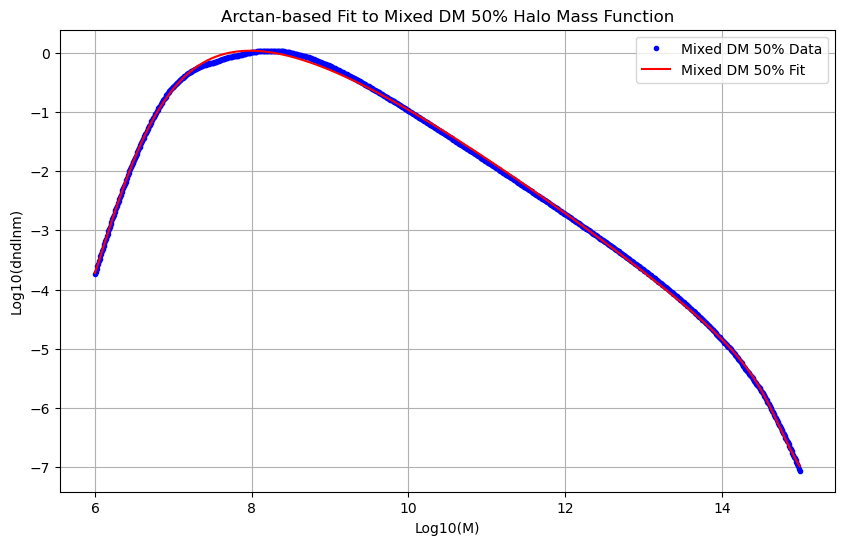

Optimal parameters for Mixed DM 50% are: [-1.0573512  -5.09138558 -1.01968703  6.04738589  1.84263721  0.67141628
 -2.74702634 14.73283731]


In [113]:
# 1. Prepare the Data for Mixed Dark Matter
params_mixed_50 = {
    'H0': 67.32117,
    'omega_b': 0.02238280,
    'N_ur': 3.046,
    'omega_cdm': 0.06005375,  # Modified for mixed dark matter
    'N_ncdm': 1,
    'omega_ncdm': 0.06005375,
    'm_ncdm': 9000.0,
    'YHe': 0.2454006,
    'tau_reio': 0.05430842,
    'n_s': 0.9660499,
    'A_s': 2.100549e-09
}
hm_mixed_50 = generate_halo_model_v2(run_class(prepare_class_params(params_mixed_50)), prepare_class_params(params_mixed_50))
log_m_mixed_50 = np.log10(hm_mixed_50.m[:900])
log_dndlnm_mixed_50 = np.log10(hm_mixed_50.dndlnm[:900])

# 2. Curve Fitting
# Use a similar guess as a starting point or adjust based on your needs
initial_guess_mixed_50 = [-1.92272672, -14.34786999, -0.54402045, 7.31357875, 3.68512658, -200, -15, 15]
popt_mixed_50, pcov_mixed_50 = curve_fit(fitting_hmf_mixed, log_m_mixed_50, log_dndlnm_mixed_50, p0=initial_guess_mixed_50)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_m_mixed_50, log_dndlnm_mixed_50, 'b.', label='Mixed DM 50% Data')
plt.plot(log_m_mixed_50, fitting_hmf_mixed(log_m_mixed_50, *popt_mixed_50), 'r-', label='Mixed DM 50% Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to Mixed DM 50% Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters for Mixed DM 50% are:", popt_mixed_50)


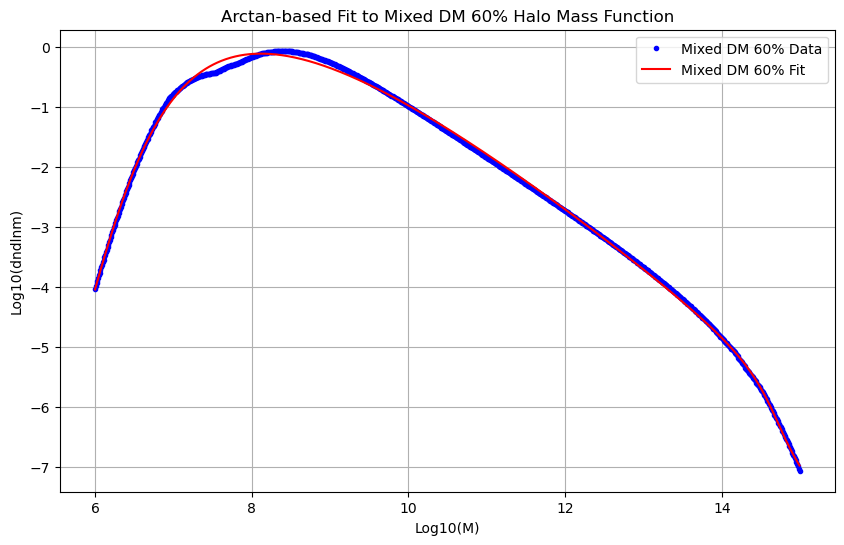

Optimal parameters for Mixed DM 60% are: [-1.1226348  -6.6286117  -0.89602317  5.81077716  0.66657985  0.59854439
 -3.09425493 14.71762825]


In [115]:
# 1. Prepare the Data for Mixed Dark Matter (60%)
params_mixed_60 = {
    'H0': 67.32117,
    'omega_b': 0.02238280,
    'N_ur': 3.046,
    'omega_cdm': 0.12 * 0.40,  # Modified for 60% mixed dark matter
    'N_ncdm': 1,
    'omega_ncdm': 0.12 * 0.60,
    'm_ncdm': 9000.0,
    'YHe': 0.2454006,
    'tau_reio': 0.05430842,
    'n_s': 0.9660499,
    'A_s': 2.100549e-09
}

hm_mixed_60 = generate_halo_model_v2(run_class(prepare_class_params(params_mixed_60)), prepare_class_params(params_mixed_60))
log_m_mixed_60 = np.log10(hm_mixed_60.m[:900])
log_dndlnm_mixed_60 = np.log10(hm_mixed_60.dndlnm[:900])

# 2. Curve Fitting
# Use the previous guess as a starting point or adjust based on your needs
initial_guess_mixed_60 = [-1.92272672, -14.34786999, -0.54402045, 7.31357875, 3.68512658, -200, -15, 15]
popt_mixed_60, pcov_mixed_60 = curve_fit(fitting_hmf_mixed, log_m_mixed_60, log_dndlnm_mixed_60, p0=initial_guess_mixed_60)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_m_mixed_60, log_dndlnm_mixed_60, 'b.', label='Mixed DM 60% Data')
plt.plot(log_m_mixed_60, fitting_hmf_mixed(log_m_mixed_60, *popt_mixed_60), 'r-', label='Mixed DM 60% Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to Mixed DM 60% Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters for Mixed DM 60% are:", popt_mixed_60)



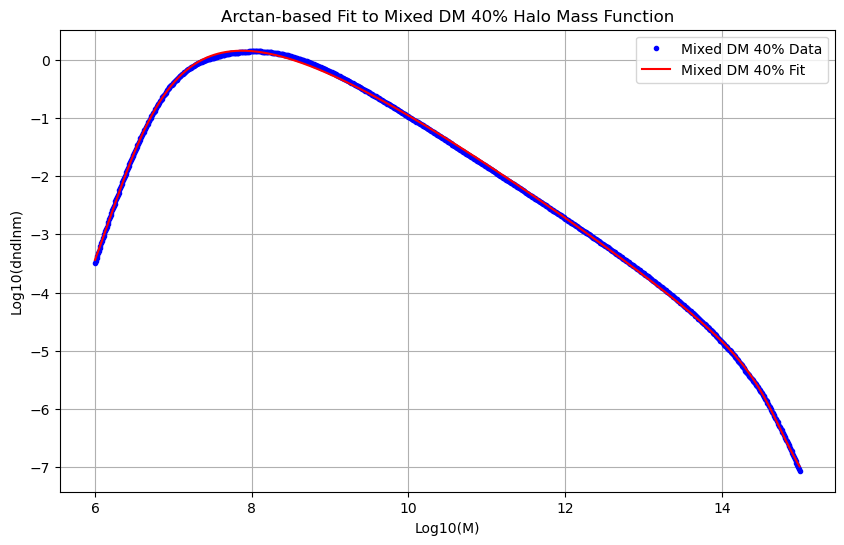

Optimal parameters for Mixed DM 40% are: [-1.01996605 -4.25380826 -1.13927795  6.18023361  2.45733408  0.71141786
 -2.5957742  14.73985178]


In [116]:
# 1. Prepare the Data for Mixed Dark Matter (40%)
params_mixed_40 = {
    'H0': 67.32117,
    'omega_b': 0.02238280,
    'N_ur': 3.046,
    'omega_cdm': 0.12 * 0.60,  # Modified for 40% mixed dark matter
    'N_ncdm': 1,
    'omega_ncdm': 0.12 * 0.40,
    'm_ncdm': 9000.0,
    'YHe': 0.2454006,
    'tau_reio': 0.05430842,
    'n_s': 0.9660499,
    'A_s': 2.100549e-09
}

hm_mixed_40 = generate_halo_model_v2(run_class(prepare_class_params(params_mixed_40)), prepare_class_params(params_mixed_40))
log_m_mixed_40 = np.log10(hm_mixed_40.m[:900])
log_dndlnm_mixed_40 = np.log10(hm_mixed_40.dndlnm[:900])

# 2. Curve Fitting
# Use the previous guess as a starting point or adjust based on your needs
initial_guess_mixed_40 = [-1.92272672, -14.34786999, -0.54402045, 7.31357875, 3.68512658, -200, -15, 15]
popt_mixed_40, pcov_mixed_40 = curve_fit(fitting_hmf_mixed, log_m_mixed_40, log_dndlnm_mixed_40, p0=initial_guess_mixed_40)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.plot(log_m_mixed_40, log_dndlnm_mixed_40, 'b.', label='Mixed DM 40% Data')
plt.plot(log_m_mixed_40, fitting_hmf_mixed(log_m_mixed_40, *popt_mixed_40), 'r-', label='Mixed DM 40% Fit')
plt.xlabel('Log10(M)')
plt.ylabel('Log10(dndlnm)')
plt.title('Arctan-based Fit to Mixed DM 40% Halo Mass Function')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal parameters for Mixed DM 40% are:", popt_mixed_40)


Here is how different parameters in the fitting function affect the overall trend. 

In [157]:
base_params = [-1.04934422, -3.54193099, -1.39766901,  6.45412195,  4.72616066,  0.24017588,
 -5.12043033, 14.67077335]

param_dict = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}

def plot_for_param(param_name, values, y_low, y_high):
    filenames = []
    for value in values:
        fig = plt.figure(figsize=(10, 6))
        temp_params = base_params.copy()
        temp_params[param_dict[param_name]] = value

        x = np.linspace(6, 15, 400)  # Example range for log10(M)
        y = fitting_hmf_mixed(x, *temp_params)

        plt.plot(x, y, label=f"{param_name} = {value:.2f}")
        plt.xlabel('Log10(M)')
        plt.ylabel('Log10(dndlnm)')
        plt.legend()
        plt.grid(True)
        plt.ylim(y_low, y_high)
        filename = f"tmp_{param_name}_{value:.2f}.png"
        plt.savefig(filename)
        filenames.append(filename)
        plt.close(fig)
    return filenames

def create_gif_for_param(param_name, values, y_low, y_high):
    filenames = plot_for_param(param_name, values, y_low, y_high)
    with imageio.get_writer(f'{param_name}_change.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
            os.remove(filename)
            
    return f"{param_name}_change.gif"

/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


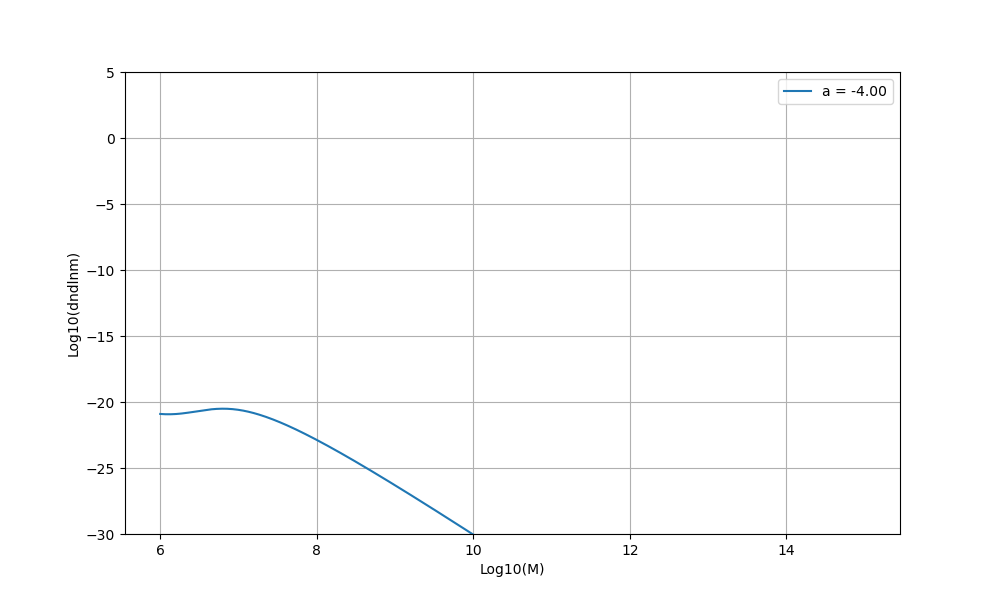

In [161]:
gif_filename = create_gif_for_param('a', np.linspace(-4, -1, 30), -30, 5)
display(Image(filename=gif_filename))


/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


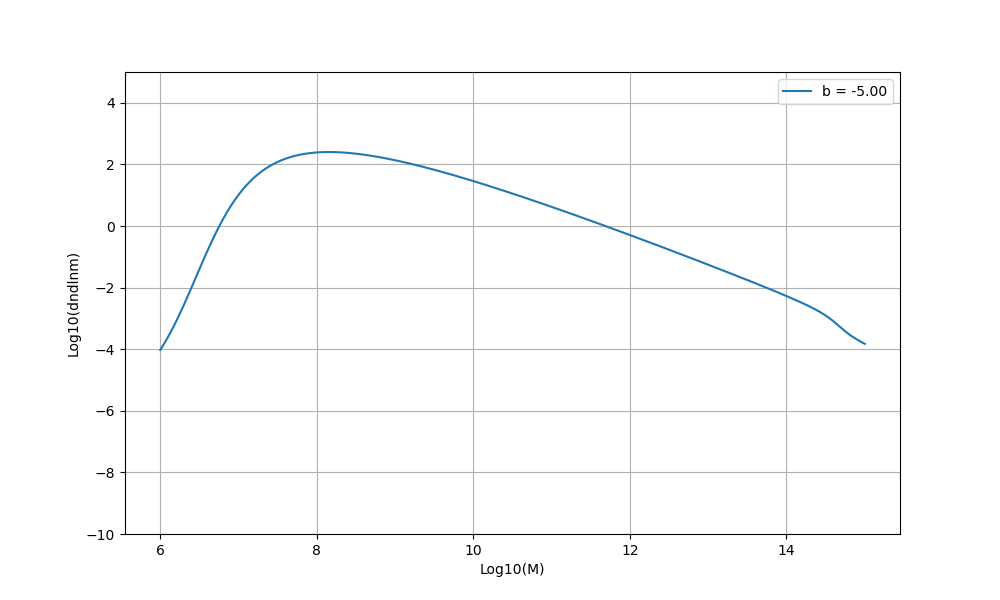

In [159]:
gif_filename = create_gif_for_param('b', np.linspace(-5, -2, 30), -10, 5)
display(Image(filename=gif_filename))

/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


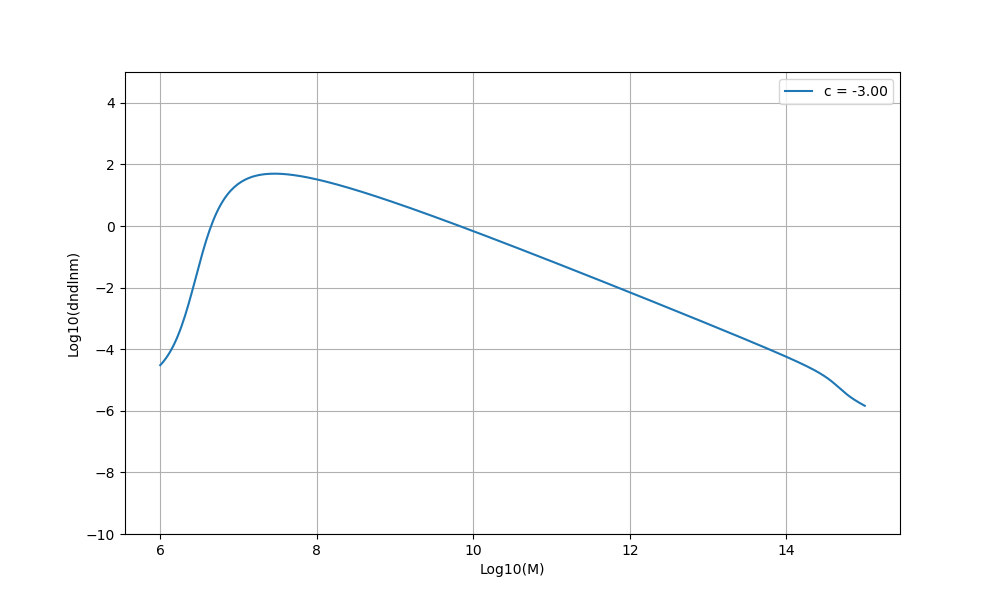

In [163]:
gif_filename = create_gif_for_param('c', np.linspace(-3, 0, 30), -10, 5)
display(Image(filename=gif_filename))

/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


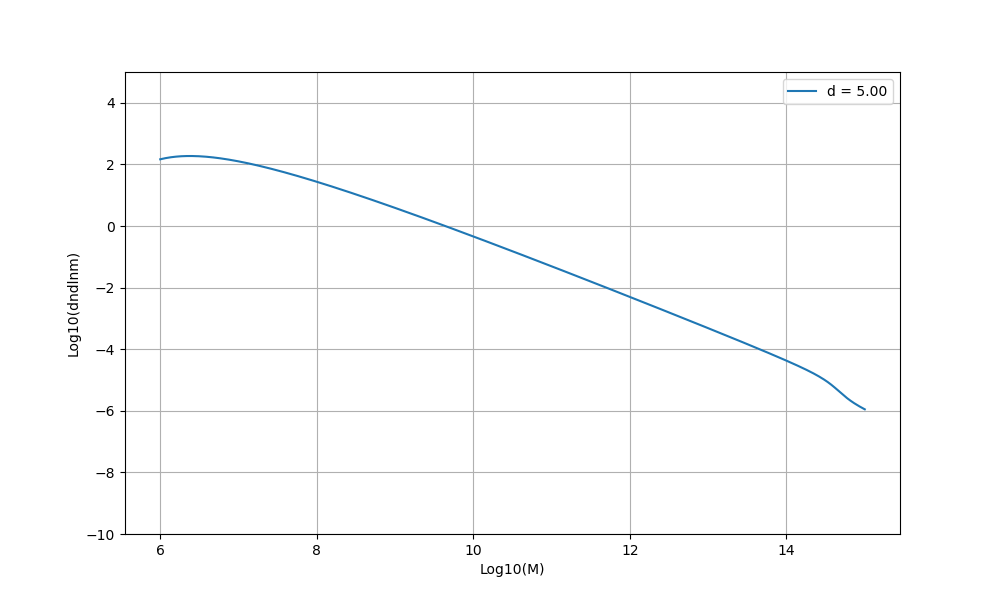

In [165]:
gif_filename = create_gif_for_param('d', np.linspace(5, 8, 30), -10, 5)
display(Image(filename=gif_filename))

/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


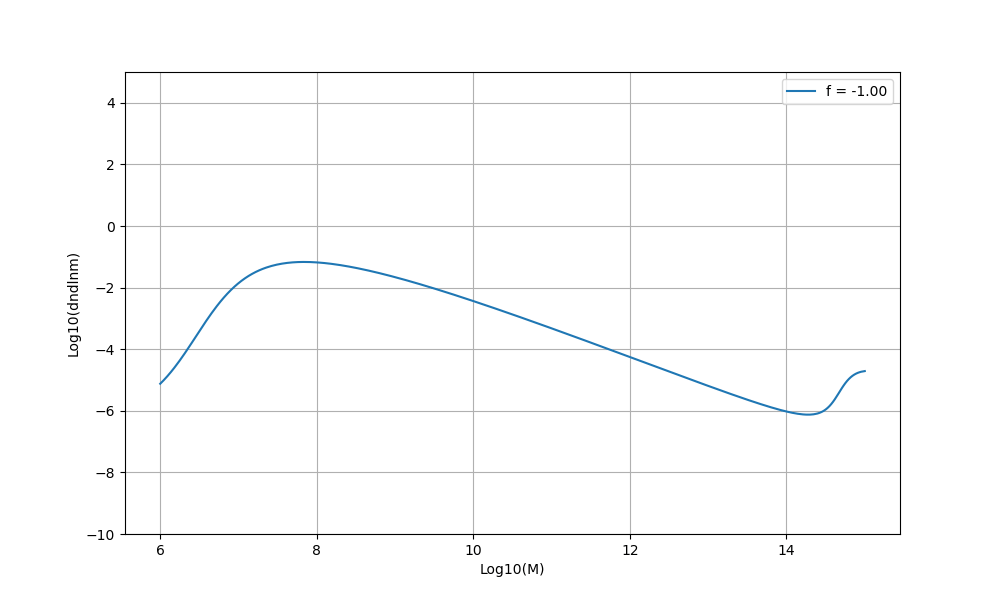

In [166]:
gif_filename = create_gif_for_param('f', np.linspace(-1, 2, 30), -10, 5)
display(Image(filename=gif_filename))

/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


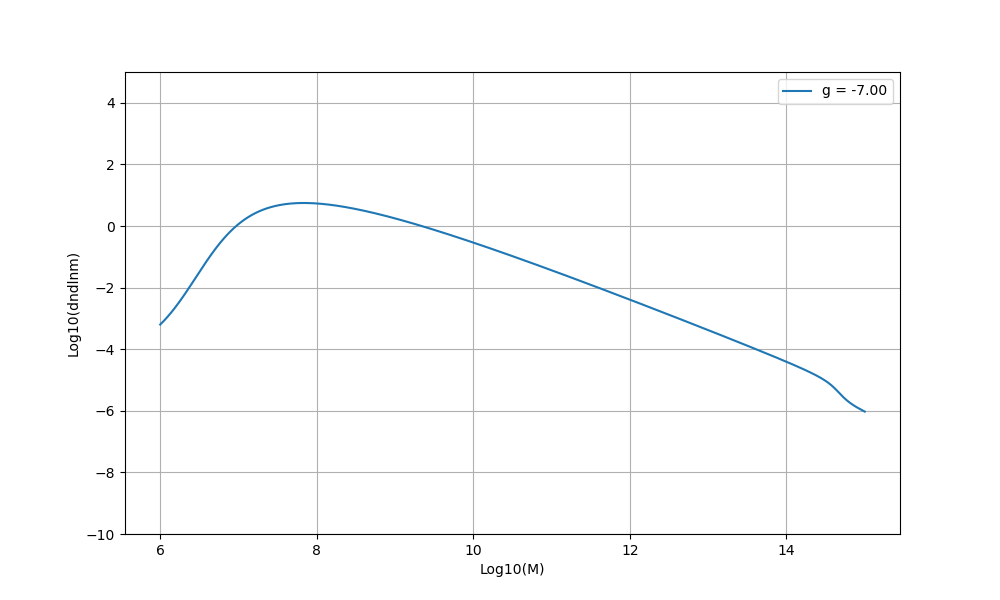

In [167]:
gif_filename = create_gif_for_param('g', np.linspace(-7, -4, 30), -10, 5)
display(Image(filename=gif_filename))

/var/folders/m7/sqr49s1j4dj15rmbr6zpsmkh0000gn/T/ipykernel_7457/1217542819.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


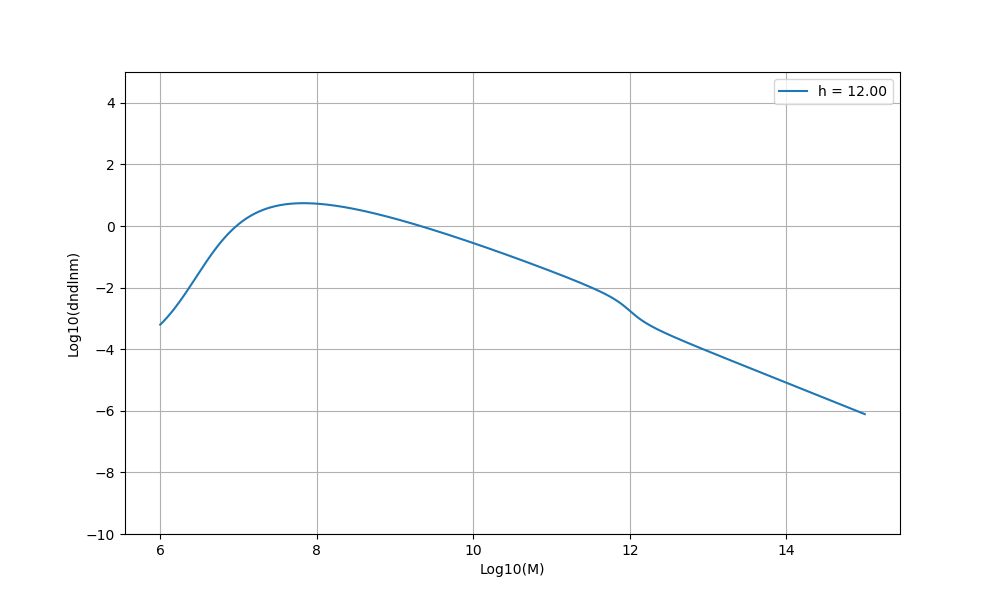

In [168]:
gif_filename = create_gif_for_param('h', np.linspace(12, 15, 30), -10, 5)
display(Image(filename=gif_filename))